<a href="https://colab.research.google.com/github/yain22/Data-manipulation-with-R-and-Python/blob/master/Data_Wrangling_with_R_and_the_Tidyverse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling with R and the Tidyverse

## Installation 

In [ ]:
install.packages("tidyverse")
library("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
install.packages("devtools")
devtools::install_github("rstudio/EDAWR")
library("EDAWR")
# Datasets: stroms, pollution, cases, tb

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




glue         (1.4.1 -> 1.4.2      ) [CRAN]
vctrs        (0.3.2 -> 0.3.4      ) [CRAN]
curl         (4.2   -> 4.3        ) [CRAN]
TTR          (NA    -> 0.24.1     ) [CRAN]
xts          (NA    -> 0.12-0     ) [CRAN]
quantmod     (NA    -> 0.4.17     ) [CRAN]
zoo          (NA    -> 1.8-8      ) [CRAN]
quadprog     (NA    -> 1.5-8      ) [CRAN]
rprojroot    (1.2   -> 1.3-2      ) [CRAN]
farver       (2.0.1 -> 2.0.3      ) [CRAN]
RcppArmad... (NA    -> 0.9.900.2.0) [CRAN]
urca         (NA    -> 1.3-0      ) [CRAN]
tseries      (NA    -> 0.10-47    ) [CRAN]
timeDate     (NA    -> 3043.102   ) [CRAN]
lmtest       (NA    -> 0.9-37     ) [CRAN]
fracdiff     (NA    -> 1.5-1      ) [CRAN]
babynames    (NA    -> 1.0.0      ) [CRAN]
forecast     (NA    -> 8.12       ) [CRAN]


Installing 18 packages: glue, vctrs, curl, TTR, xts, quantmod, zoo, quadprog, rprojroot, farver, RcppArmadillo, urca, tseries, timeDate, lmtest, fracdiff, babynames, forecast

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpLPclEk/remotes6717764138/rstudio-EDAWR-fbfee98/DESCRIPTION’
─  preparing ‘EDAWR’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘EDAWR_0.1.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
class(tbl_df(diamonds) ) 
class(diamonds)

[1] "tbl_df"     "tbl"        "data.frame"

[1] "tbl_df"     "tbl"        "data.frame"

## View() (Not working on Web editor)

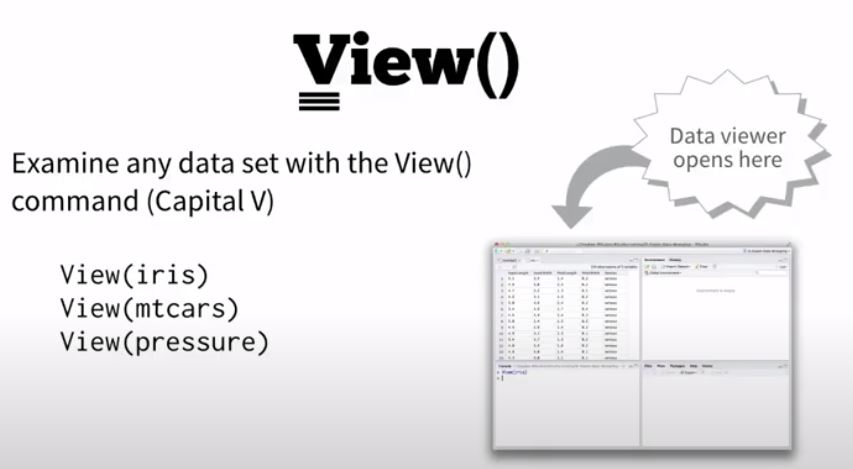

In [ ]:
# View(diamonds) 

ERROR: ignored

## Pipe Operator %>% from dplyr

In [ ]:
# Example 1
diamonds$x %>%
  mean() %>%
    sqrt()

# Example 2
diamonds$x %>%
  round(2) %>%
    mean()

[1] 2.393984

[1] 5.731157

## Idealistic Dataset

Idealistically, we often want to work with dataset with the following characteristics:

*   Each row vector of the table only represents one observation;
*   Each column vector of the table only represents one variable;
*   Without "nested (hierarchical) data structure".



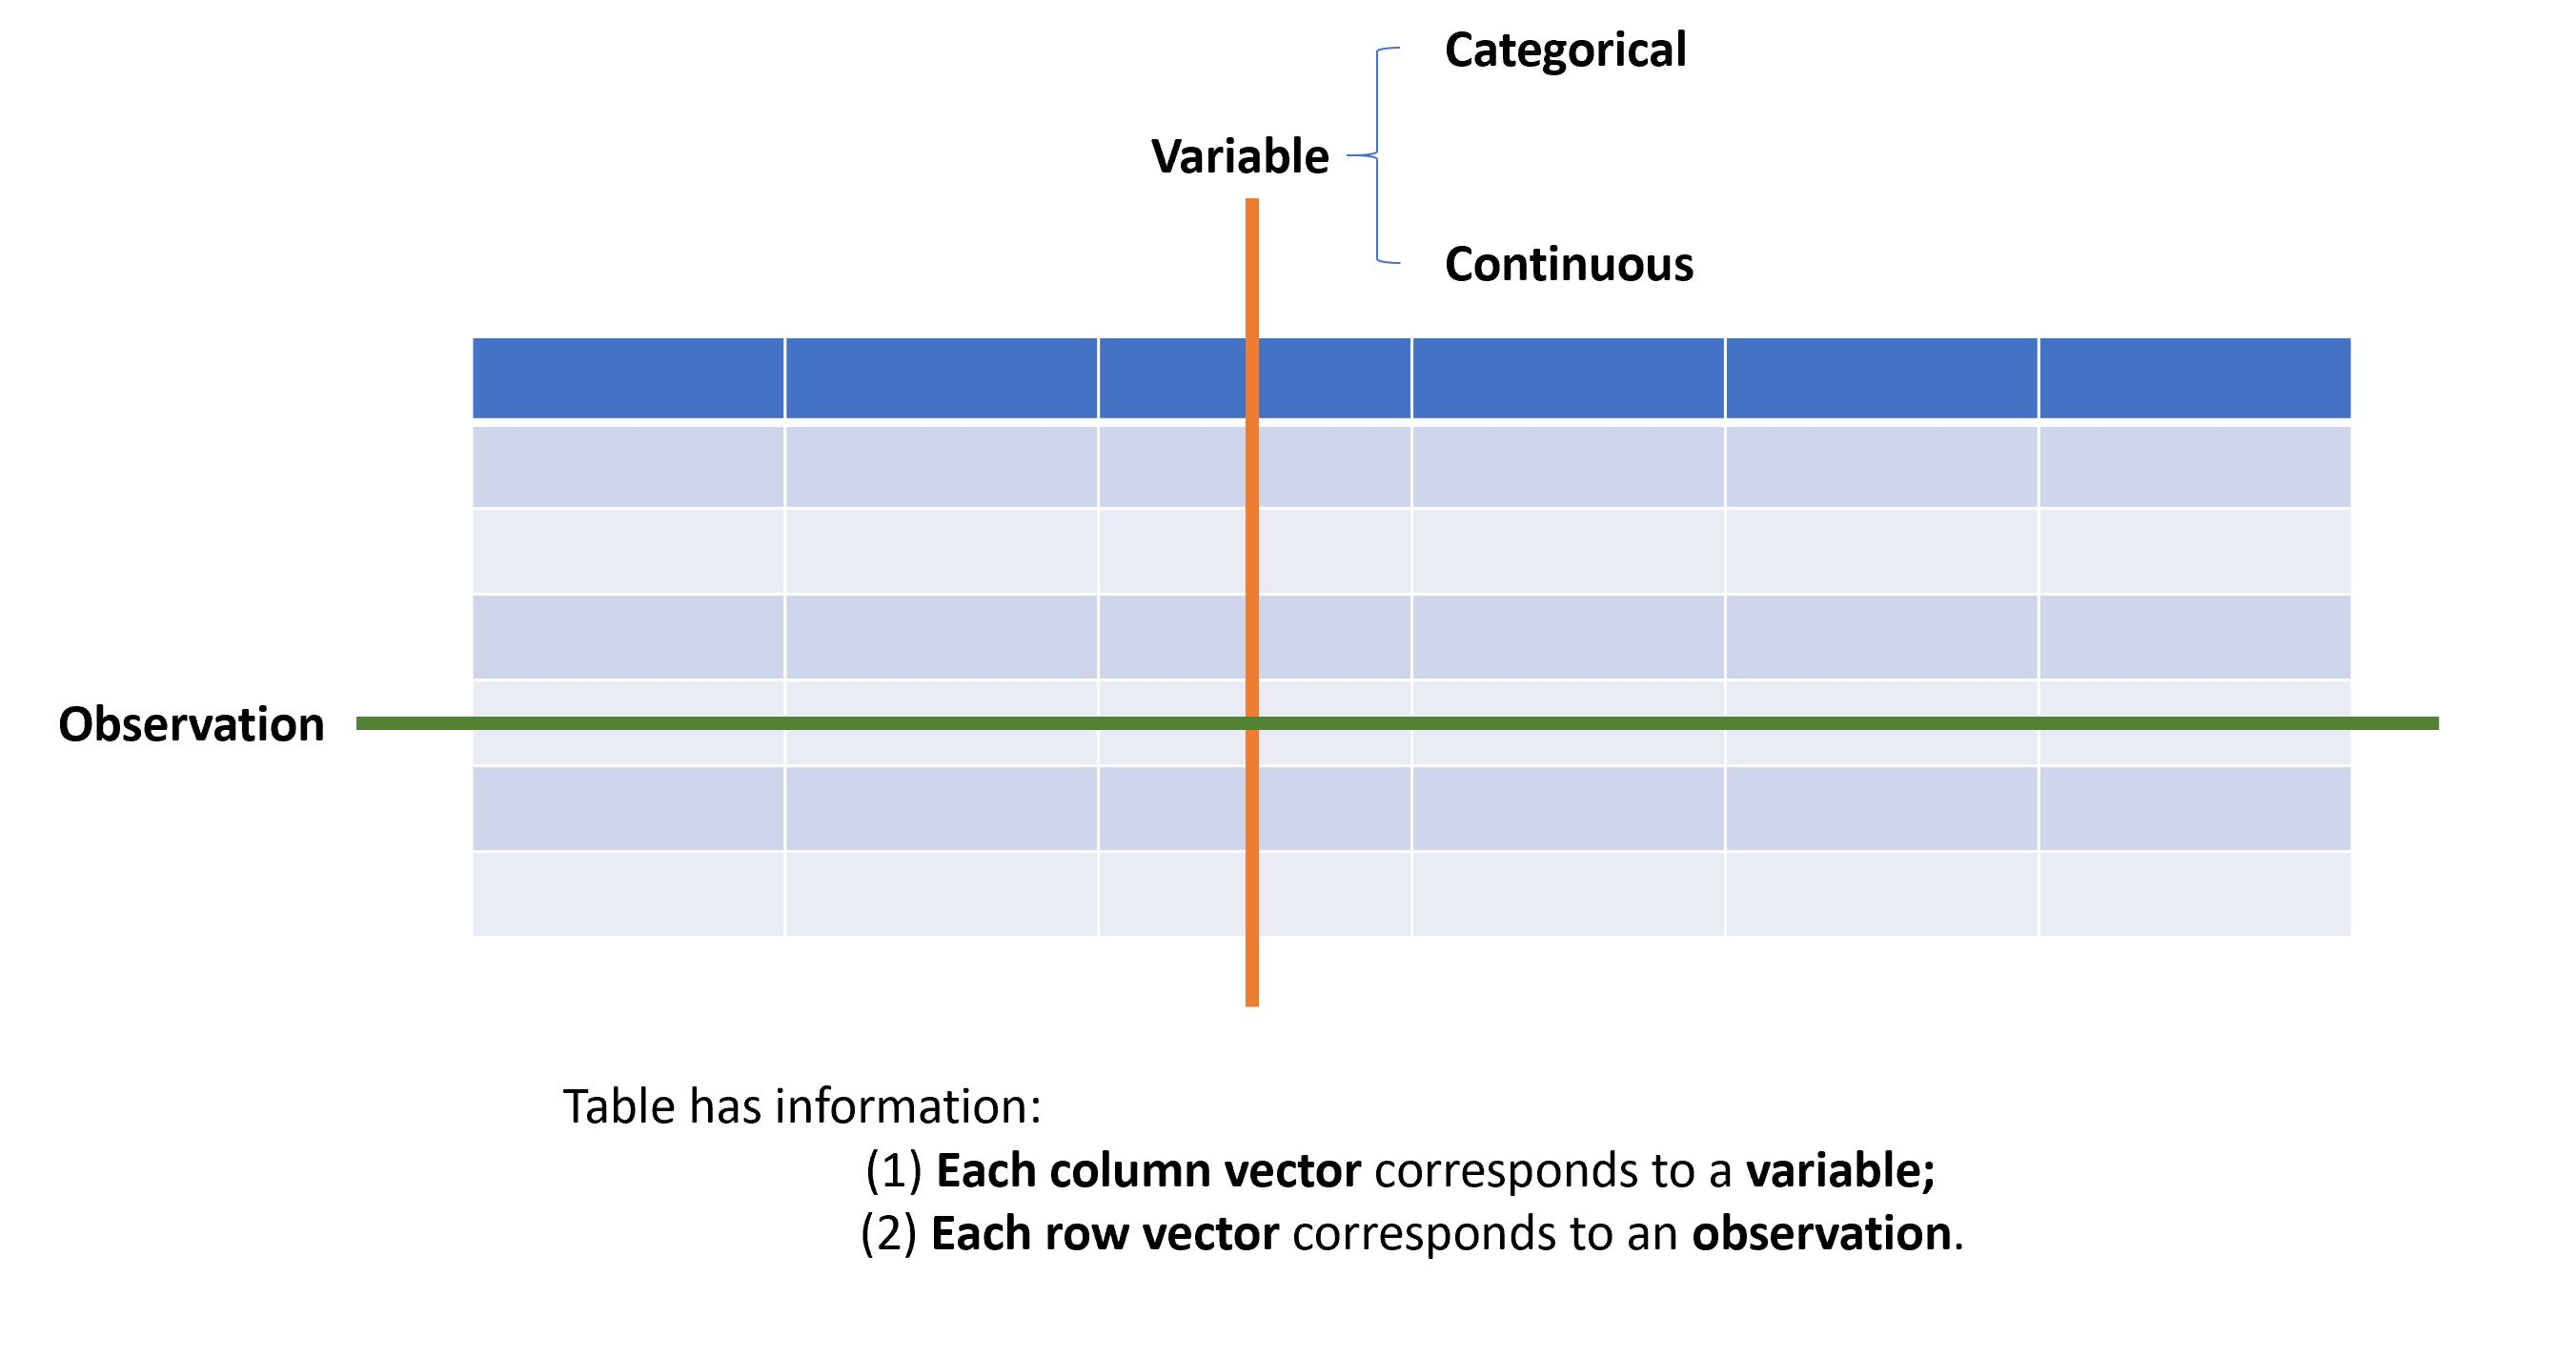

## Three Types of Data Structure

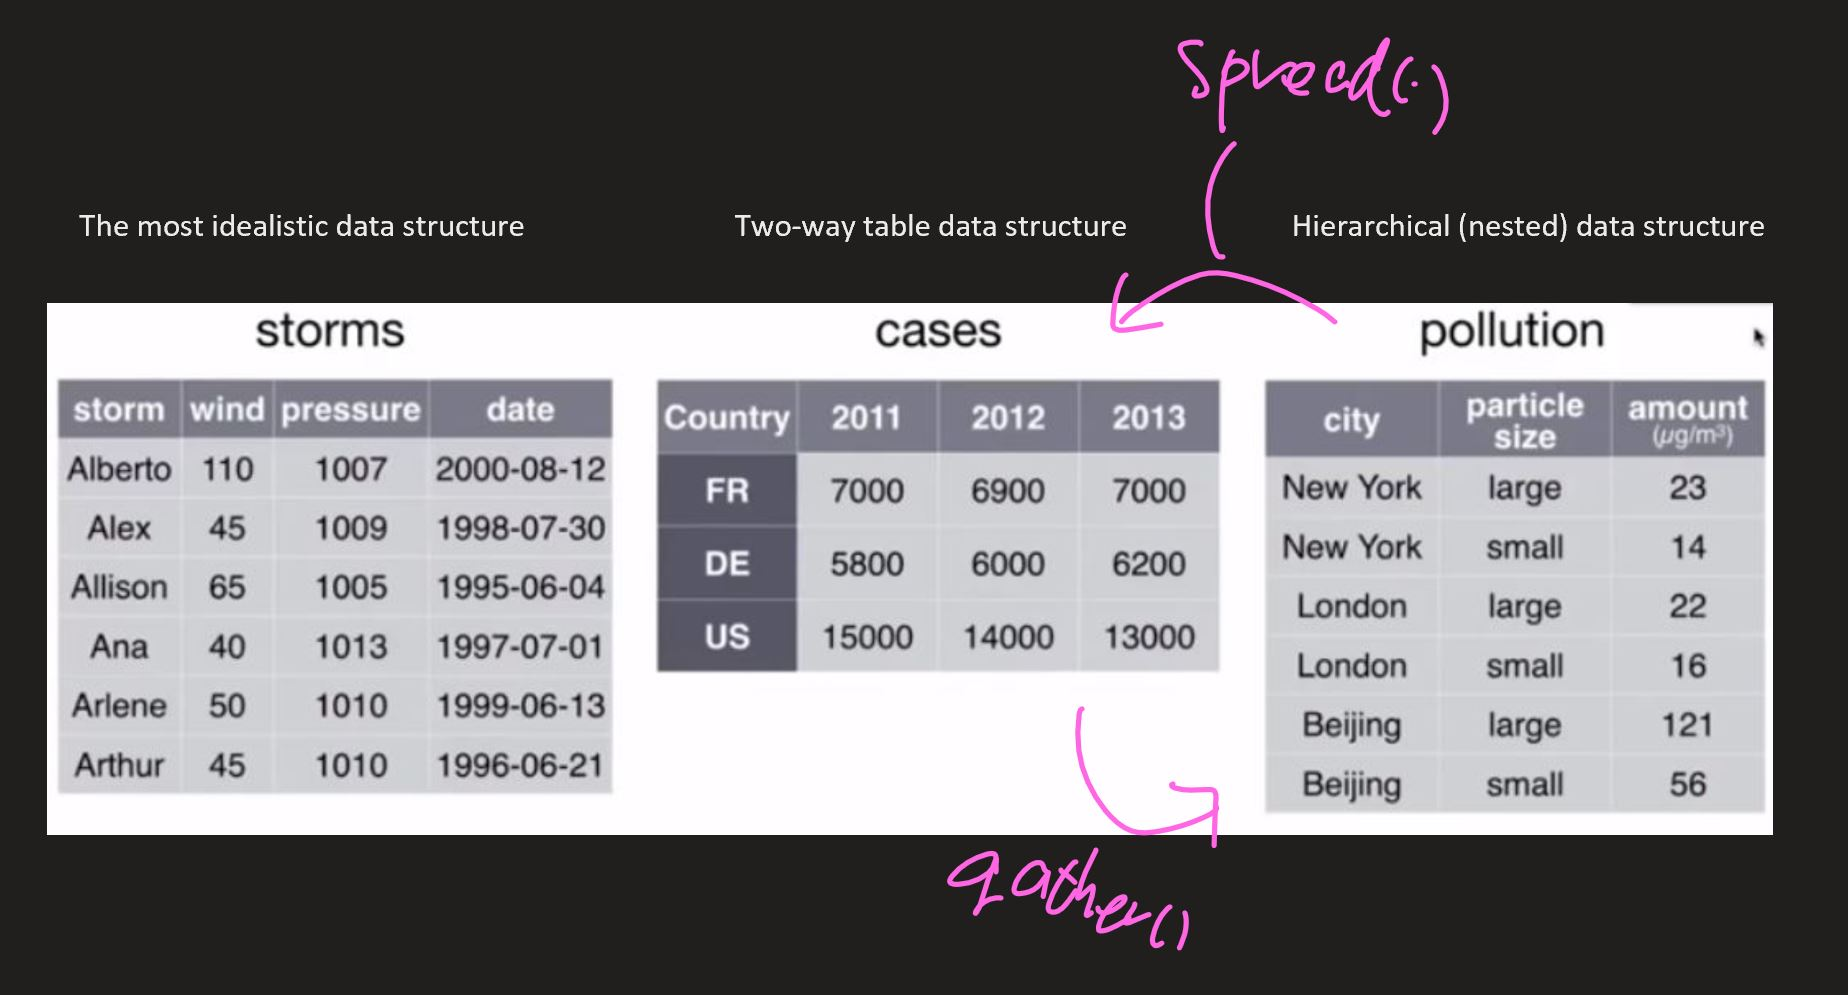

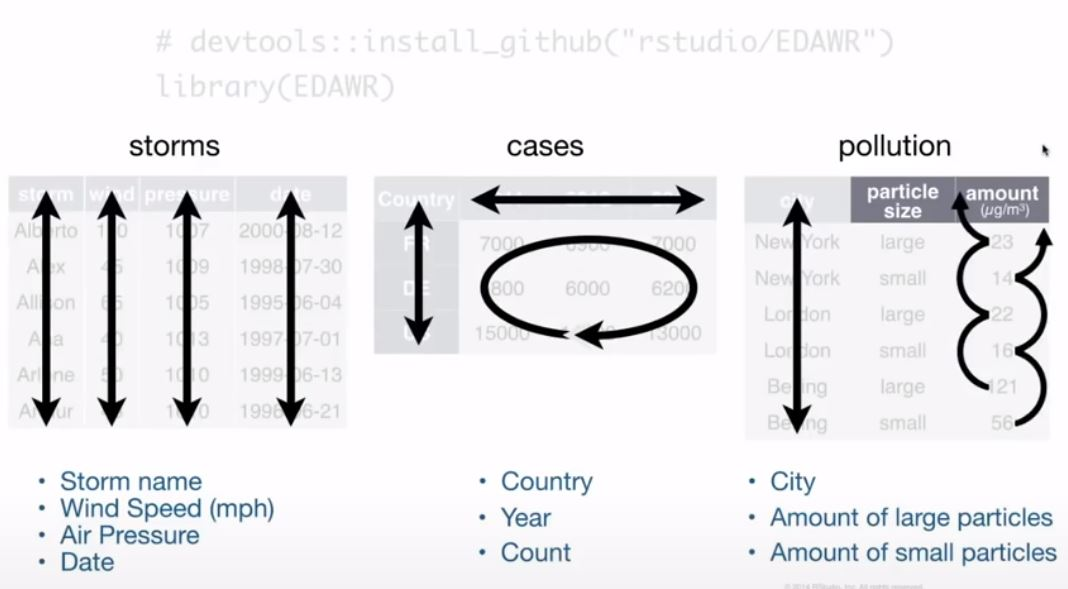

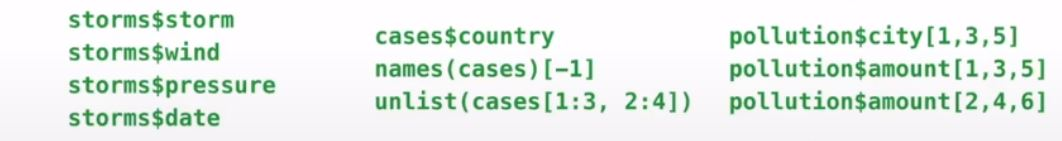

## gather(): Convert from Two-way Table Structure to Hierarhical Structure 

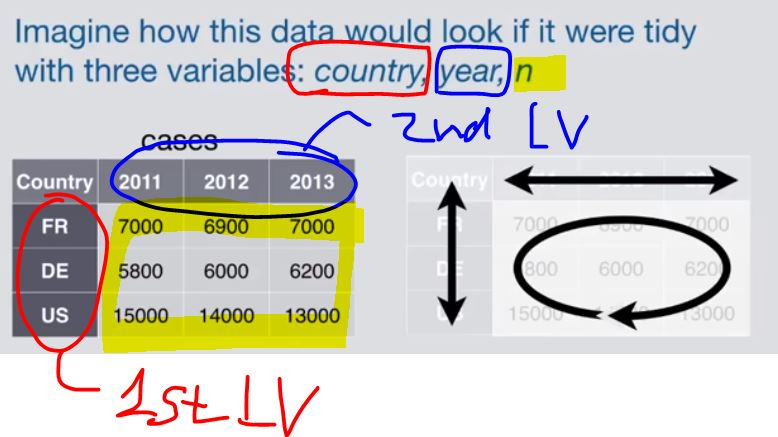

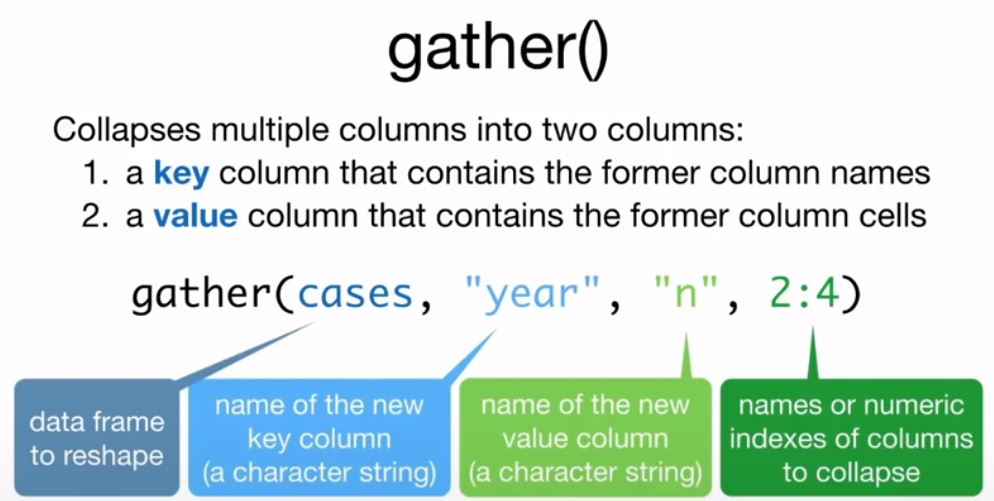

In [ ]:
library("EDAWR")

# Original dataset
cases

# Tidy dataset
#gather(cases, "year","n",2:3)
gather(cases, "year","n",2:4)

# First level: Country
# Second level: year

country,2011,2012,2013
<chr>,<dbl>,<dbl>,<dbl>
FR,7000,6900,7000
DE,5800,6000,6200
US,15000,14000,13000


country,year,n
<chr>,<chr>,<dbl>
FR,2011,7000
DE,2011,5800
US,2011,15000
FR,2012,6900
DE,2012,6000
US,2012,14000
FR,2013,7000
DE,2013,6200
US,2013,13000


## spread(): convert from Hierarhical Structure to Two-way Table Structure

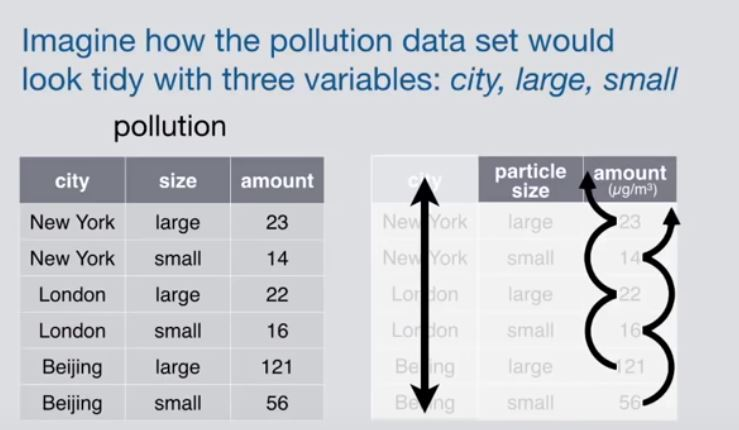

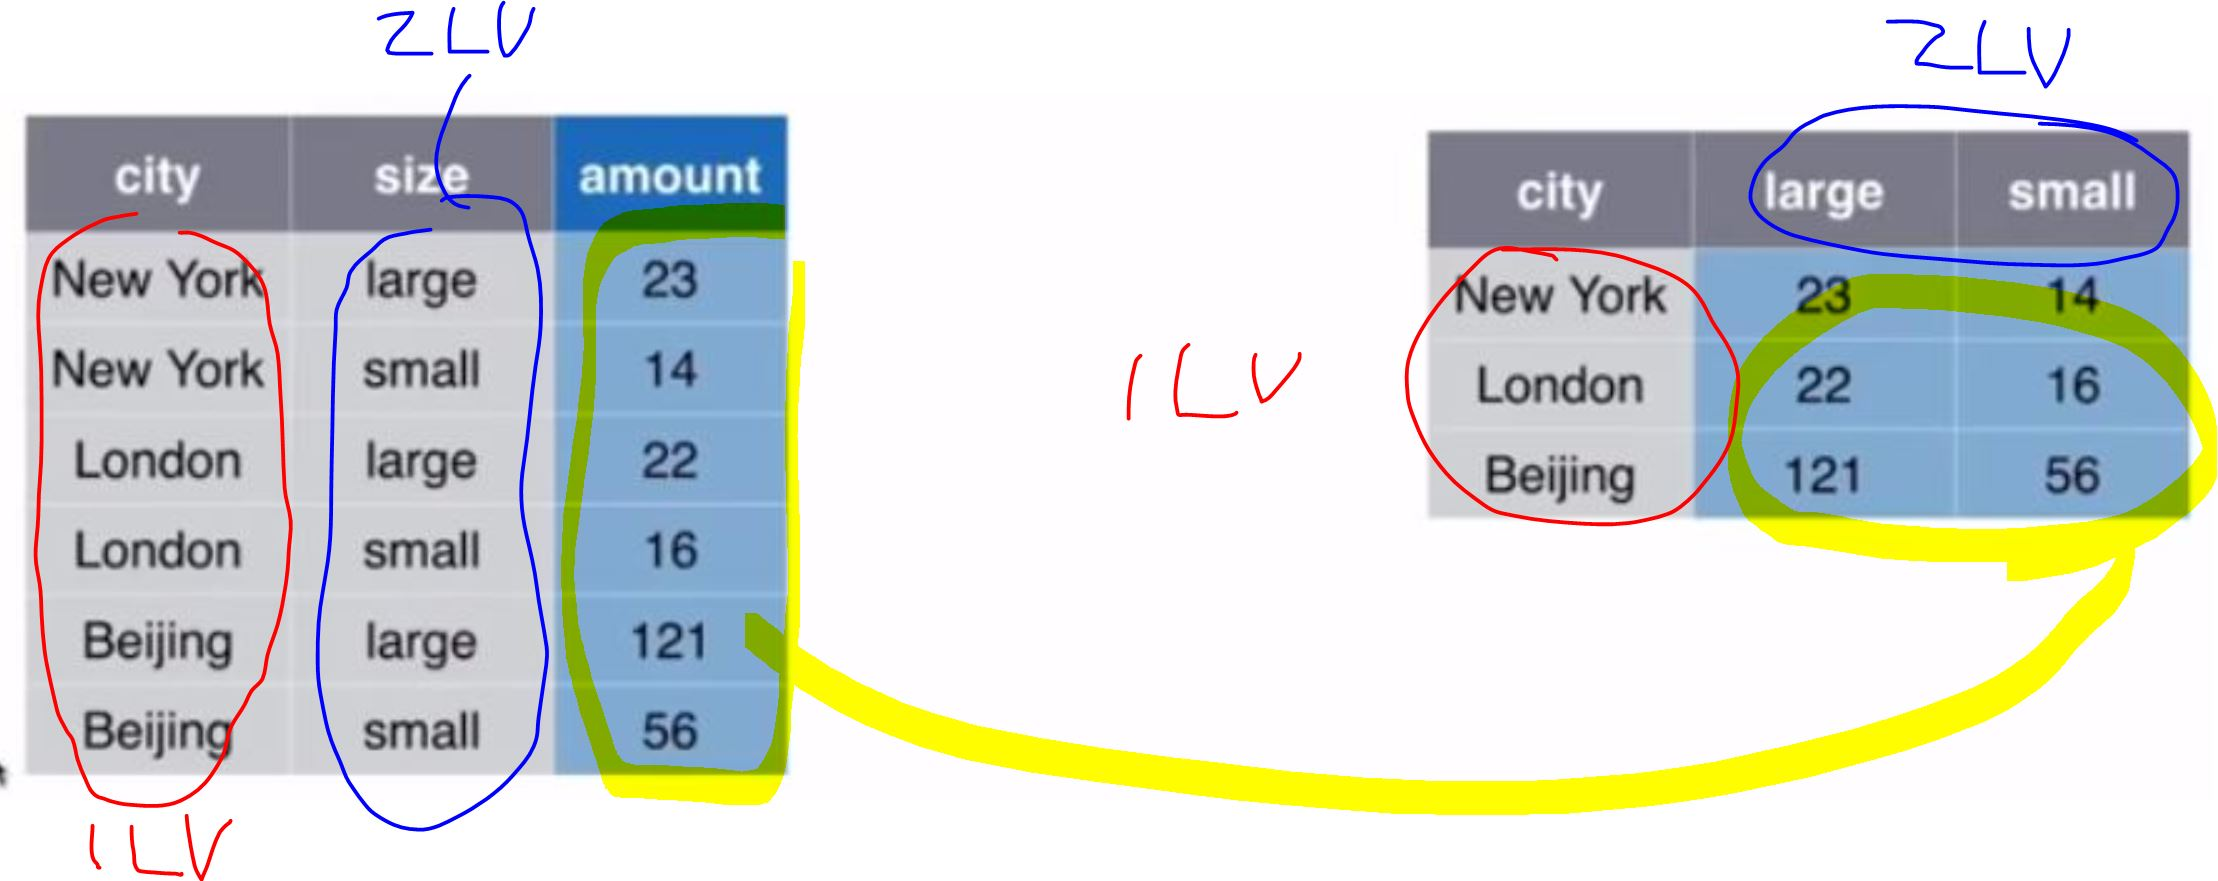

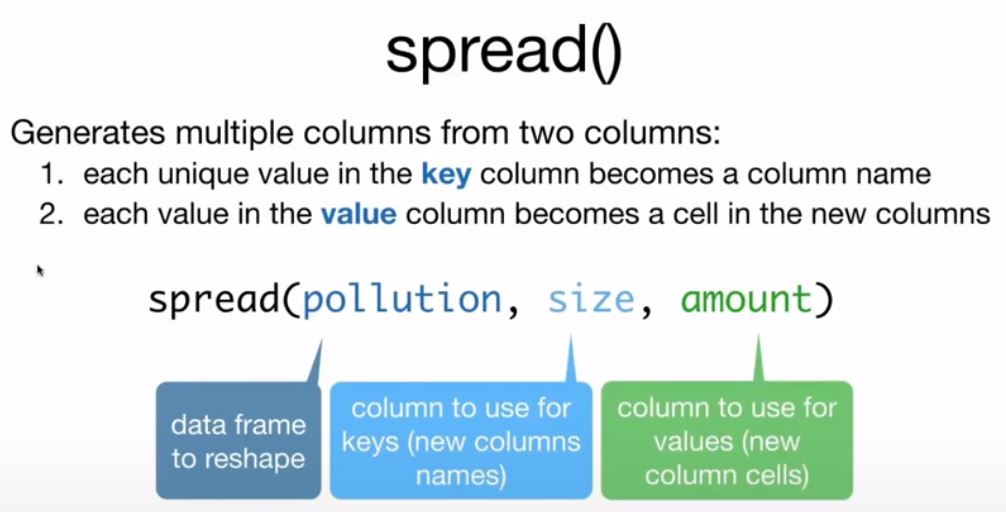

In [ ]:
library("EDAWR")

# Original dataset
pollution

# Tidy dataset
spread(pollution,size, amount) 

city,size,amount
<chr>,<chr>,<dbl>
New York,large,23
New York,small,14
London,large,22
London,small,16
Beijing,large,121
Beijing,small,56


city,large,small
<chr>,<dbl>,<dbl>
Beijing,121,56
London,22,16
New York,23,14


## Relationship between gather() and spread()

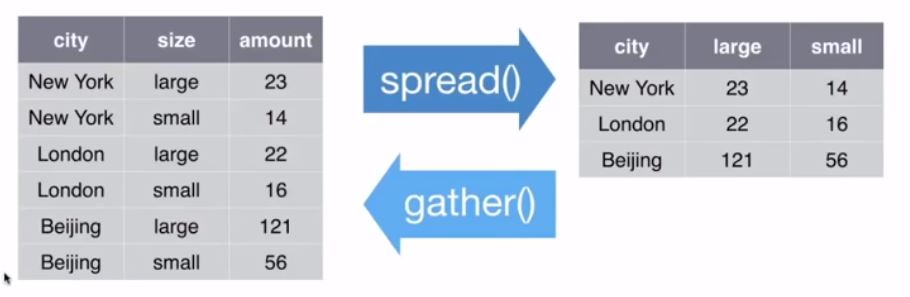

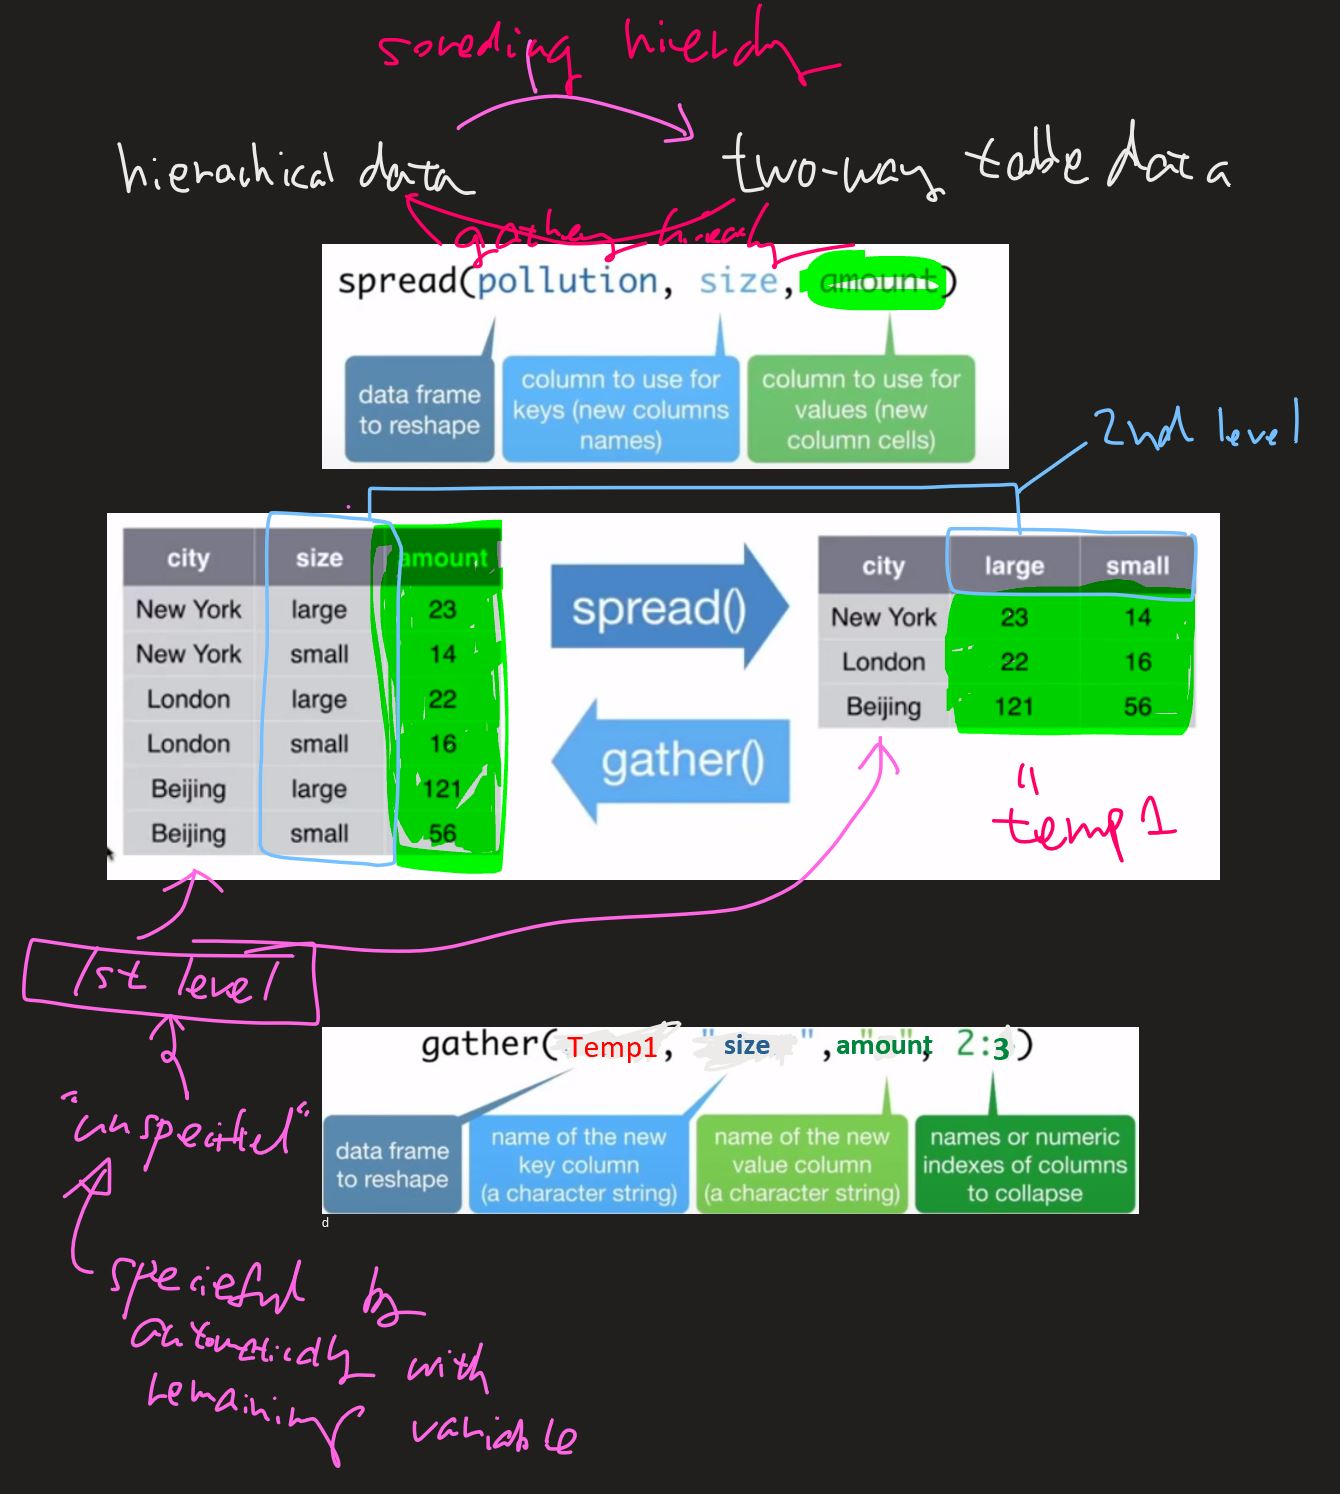

In [ ]:
# Original dataset
pollution

# Tidy dataset
temp1 = spread(pollution,"size", "amount") 
temp1

# Tidy dateset
temp2 = gather(temp1, "size", "amount", 2:3)
temp2 %>% arrange(desc(city))


city,size,amount
<chr>,<chr>,<dbl>
New York,large,23
New York,small,14
London,large,22
London,small,16
Beijing,large,121
Beijing,small,56


city,large,small
<chr>,<dbl>,<dbl>
Beijing,121,56
London,22,16
New York,23,14


city,size,amount
<chr>,<chr>,<dbl>
New York,large,23
New York,small,14
London,large,22
London,small,16
Beijing,large,121
Beijing,small,56


## unite() and separate()

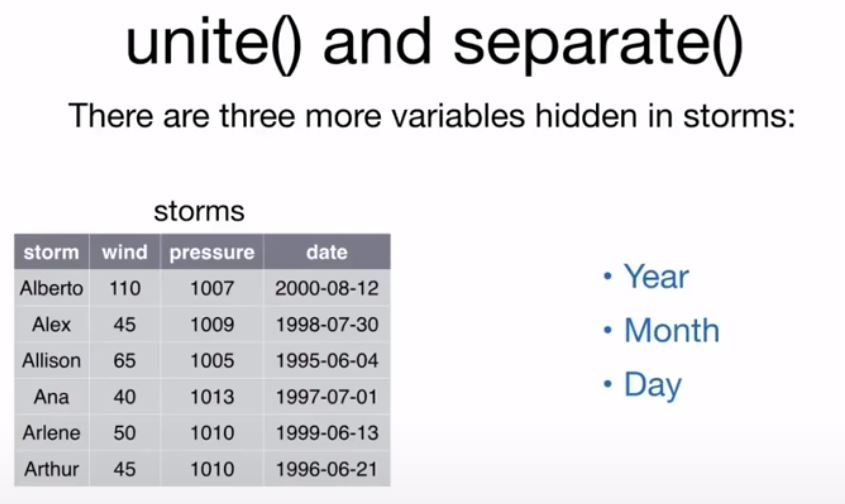

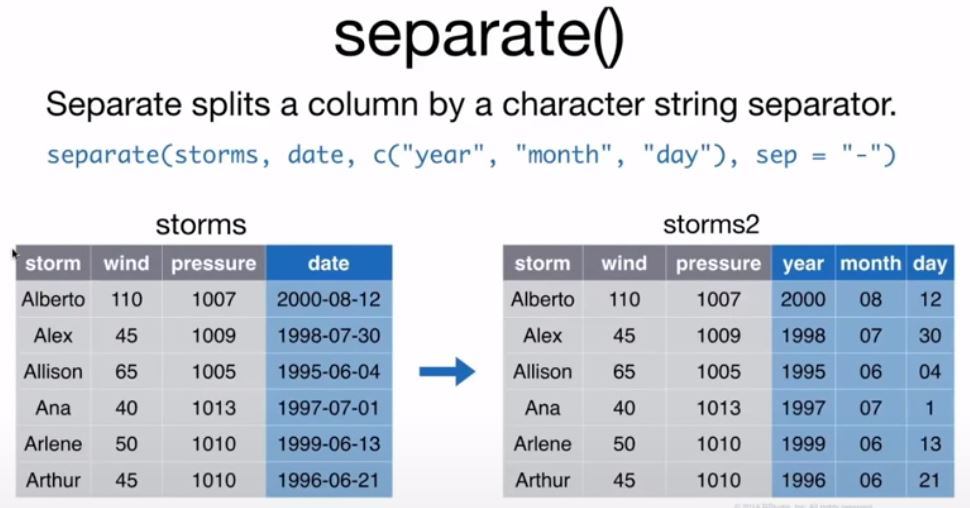

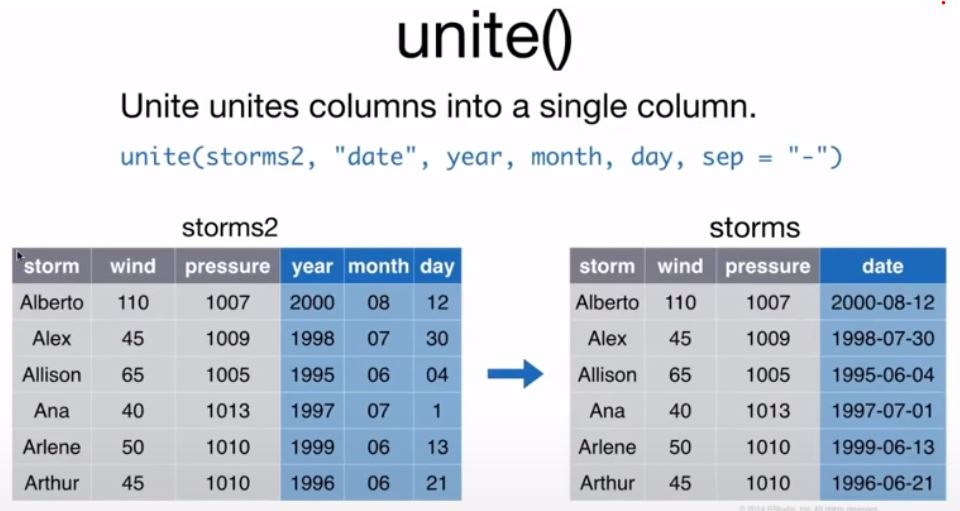

In [ ]:
temp2 = separate(storms, date, c("year","month","day"), sep= "-")
unite(temp2, "date", year,month,day, sep= "-")

storm,wind,pressure,date
<chr>,<int>,<int>,<chr>
Alberto,110,1007,2000-08-03
Alex,45,1009,1998-07-27
Allison,65,1005,1995-06-03
Ana,40,1013,1997-06-30
Arlene,50,1010,1999-06-11
Arthur,45,1010,1996-06-17


# References

Youtube Videos

1.   [Video 1](https://www.youtube.com/watch?v=jOd65mR1zfw)